<a href="https://colab.research.google.com/github/Mark-Brennan/Example-Projects/blob/main/T41_MB_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Linear Regression

The objective of this notebook is to show you how to apply the algorithm learnt in the main task to a dataset. In the case of Simple Linear Regression, a good set-up involves importing packages that will help us manipulate data and leverage the easy-to-use machine learning tools of the scikit-learn library. 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [29]:
insure_data = pd.read_csv("/content/insurance.csv")
insure_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Check that the data is - no missing data etc.**

In [30]:
insure_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
# get the number of missing data points per column
missing_values_count = insure_data.isnull().sum()

# look at the # of missing points  by column
missing_values_count[0:10]

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

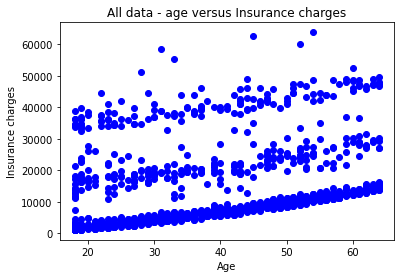

In [32]:
# The iloc function allows use to select rows from the dataframe.  
x = insure_data.iloc[:,:1].values
y = insure_data.iloc[:,-1].values

plt.scatter(x,y,color = 'b')
plt.xlabel('Age')
plt.ylabel('Insurance charges')
plt.title('All data - age versus Insurance charges')
plt.show()

##The chart above seems to have three distinct lines. Maybe explained by whether person is male/female, smoker, etc.##

##Let's look just at males##

In [33]:
male_data=insure_data[(insure_data['sex']=='male')]


male_data.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


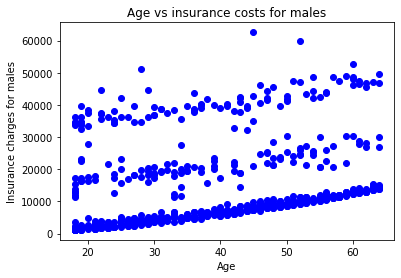

In [34]:
# The iloc function allows use to select rows from the dataframe.  
x = male_data.iloc[:,:1].values
y = male_data.iloc[:,-1].values

plt.scatter(x,y,color = 'b')
plt.xlabel('Age')
plt.ylabel('Insurance charges for males')
plt.title('Age vs insurance costs for males')
plt.show()

Just look at male data

Still have 3 lines so lets split out smokers

In [35]:
smoker_data=insure_data[(insure_data['smoker']=='yes')]


smoker_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


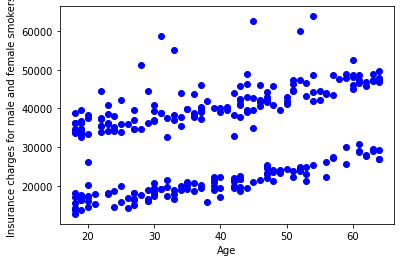

In [36]:
# The iloc function allows use to select rows from the dataframe.  
x = smoker_data.iloc[:,:1].values
y = smoker_data.iloc[:,-1].values

plt.scatter(x,y,color = 'b')
plt.xlabel('Age')
plt.ylabel('Insurance charges for male and female smokers')
plt.show()

**Still 2 distinct groups**

Lets look at BMI vs insurance cost

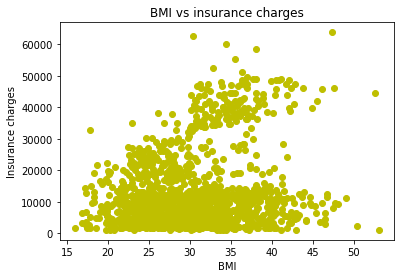

In [37]:
# The iloc function allows use to select rows from the dataframe.  
x = insure_data.iloc[:,2:3].values
y = insure_data.iloc[:,-1].values

plt.scatter(x,y,color = 'y')
plt.xlabel('BMI')
plt.ylabel('Insurance charges')
plt.title('BMI vs insurance charges')
plt.show()

**Not worth fitting a line of best fit through this !**

**Let's look at BMI just for smokers**

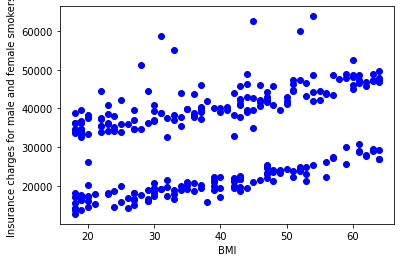

In [38]:
# The iloc function allows use to select rows from the dataframe.  
x = smoker_data.iloc[:,:1].values
y = smoker_data.iloc[:,-1].values

plt.scatter(x,y,color = 'b')
plt.xlabel('BMI')
plt.ylabel('Insurance charges for male and female smokers')
plt.show()

Above is the plot of BMI against insurance charges for smokers - again looks like 2 distinct groups. Lets look at smokers with a high BMI

In [39]:
obese_smokers=insure_data[(insure_data['smoker']=='yes')&(insure_data['bmi']>30)]




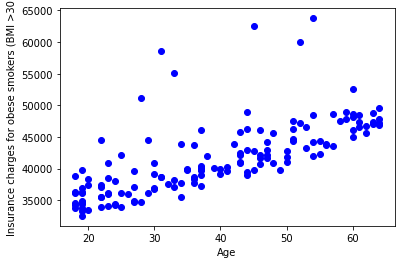

In [40]:
# The iloc function allows use to select rows from the dataframe.  
x = obese_smokers.iloc[:,:1].values
y = obese_smokers.iloc[:,-1].values

plt.scatter(x,y,color = 'b')
plt.xlabel('Age')
plt.ylabel('Insurance charges for obese smokers (BMI >30')
plt.show()

Above shows the plot of data for those that smoke and are clinically obese (BMI > 30). Definite pattern there so lets perform a linear regression

In [41]:
smoker_obese= LinearRegression()
smoker_obese.fit(x,y)

LinearRegression()

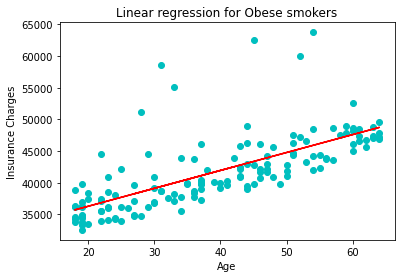

In [42]:
y_pred = smoker_obese.predict(x)

plt.scatter(x,y,color = 'c')
plt.plot(x,y_pred,color = 'r')
plt.ylabel('Insurance Charges')
plt.xlabel('Age')
plt.title('Linear regression for Obese smokers')
plt.show()

**Good - now let's make a forecast for a 50 year smoker with high BMI**

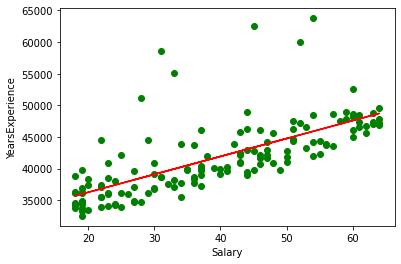

Insurance for a [[50]] year old : [44777.83791585]


In [43]:
unk_x = [[50]]

x_pred = np.append(x, unk_x).reshape(-1,1)
y_pred = smoker_obese.predict(x_pred)

plt.scatter(x,y,color = 'g')
plt.plot(x_pred,y_pred,color = 'r')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()

print(f'Insurance for a {unk_x} year old :', smoker_obese.predict(unk_x))

Above we make a prediction that a 50 year old obese smoker will pay 44777 for insurance

#Let's see if we can compare this to non smokers with normal(ish) BMI's#

In [44]:
non_smokers=insure_data[(insure_data['smoker']=='no')&(insure_data['bmi']<30)]




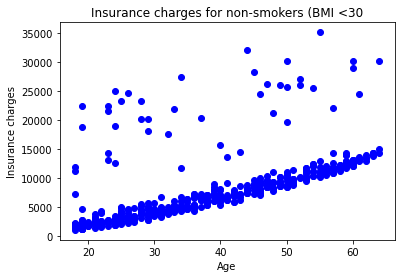

In [45]:
# The iloc function allows use to select rows from the dataframe.  
x = non_smokers.iloc[:,:1].values
y = non_smokers.iloc[:,-1].values

plt.scatter(x,y,color = 'b')
plt.xlabel('Age')
plt.ylabel('Insurance charges')
plt.title('Insurance charges for non-smokers (BMI <30')
plt.show()

Very good !! Let's compare against the obese, 50 year old smoker

In [46]:
non_smokers= LinearRegression()
non_smokers.fit(x,y)

LinearRegression()

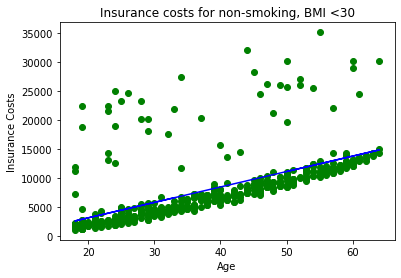

Insurance for a [[50]] year old : [11178.99325976]


In [47]:
unk_x = [[50]]

x_pred = np.append(x, unk_x).reshape(-1,1)
y_pred = non_smokers.predict(x_pred)

plt.scatter(x,y,color = 'g')
plt.plot(x_pred,y_pred,color = 'b')
plt.xlabel('Age')
plt.ylabel('Insurance Costs')
plt.title('Insurance costs for non-smoking, BMI <30')
plt.show()

print(f'Insurance for a {unk_x} year old :', non_smokers.predict(unk_x))

**Compared to the obese smoker the non-smoker with BMI less than 30 pays approximatley a quarter of the insurance charges !!! **

Let's look at one more thing

Perhaps having children/families increases insurance costs ?

Let's just look at smokers, BMI > 30, with children

In [48]:
smokers_kids=insure_data[(insure_data['smoker']=='yes')&(insure_data['bmi']>30)&(insure_data['children']>0)]




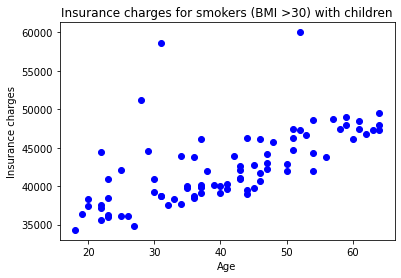

In [49]:
# The iloc function allows use to select rows from the dataframe.  
x = smokers_kids.iloc[:,:1].values
y = smokers_kids.iloc[:,-1].values

plt.scatter(x,y,color = 'b')
plt.xlabel('Age')
plt.ylabel('Insurance charges')
plt.title('Insurance charges for smokers (BMI >30) with children')
plt.show()

In [50]:
smokers_kids= LinearRegression()
smokers_kids.fit(x,y)

LinearRegression()

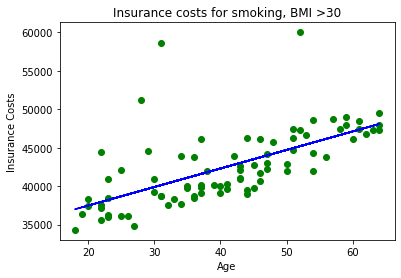

Insurance for a [[50]] year old : [44708.60400782]


In [51]:
unk_x = [[50]]

x_pred = np.append(x, unk_x).reshape(-1,1)
y_pred = smokers_kids.predict(x_pred)

plt.scatter(x,y,color = 'g')
plt.plot(x_pred,y_pred,color = 'b')
plt.xlabel('Age')
plt.ylabel('Insurance Costs')
plt.title('Insurance costs for smoking, BMI >30')
plt.show()

print(f'Insurance for a {unk_x} year old :', smokers_kids.predict(unk_x))

So interestingly also having children did not increase the insurance cost for the smokers still further !! 